# Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display
from src.helpers import *

Had to perform the following to get `librosa.load()` to work properly after encountering `Error 0x7e: cannot load sndfile.dll`
```sh
pip uninstall soundfile
pip install soundfile
```

# Read Pre-Processed Data

In [2]:
processed_audio = AudioRepository.load_processed_audio('../../data/playlist-1-extracted', start=5, limit=1)

In [3]:
feature_vector, feature_repr = processed_audio[0]
audio = feature_vector.audio
print(f'Loaded song: {audio.name}')

Loaded song: Daniel Caesar - Japanese Denim


# Visualising the Data

## Waveform

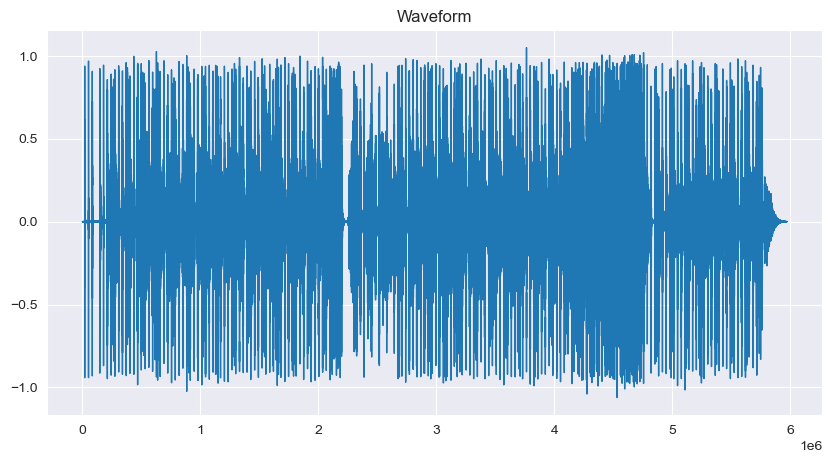

In [4]:
pd.Series(audio.waveform).plot(figsize=(10,5), lw=1, title='Waveform')
plt.show()

## Spectrogram

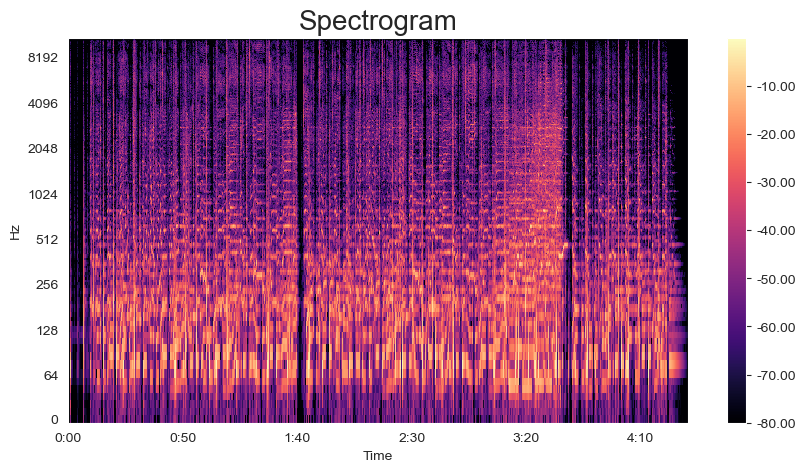

In [5]:
# Plot data
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(feature_repr.spectrogram, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Spectrogram', fontsize=20)
fig.colorbar(img, ax=ax, format='%0.2f')
plt.show()

## Mel Spectrogram

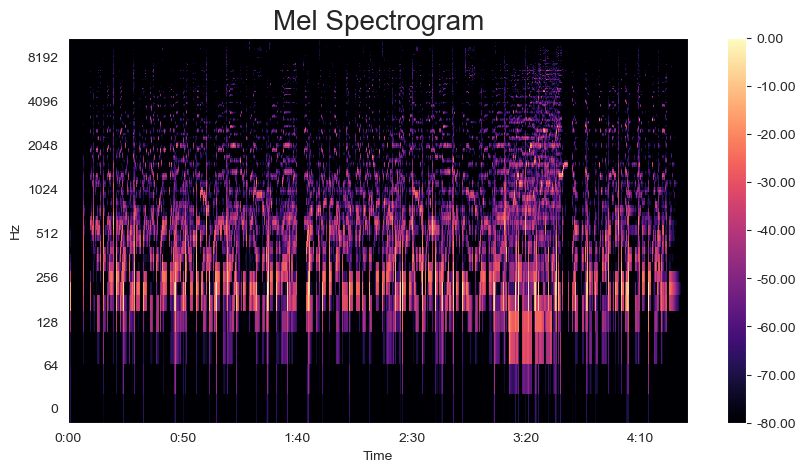

In [6]:
# Plot data
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(feature_repr.mel_spectrogram, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Mel Spectrogram', fontsize=20)
fig.colorbar(img, ax=ax, format='%0.2f')
plt.show()

# Timbral Texture Feature Extraction

## Spectral Centroid

In [7]:
# Spectral centroid
feature_vector.spectral.spectral_centroid_mean , feature_vector.spectral.spectral_centroid_var

(2107.845962142061, 915962.6136520132)

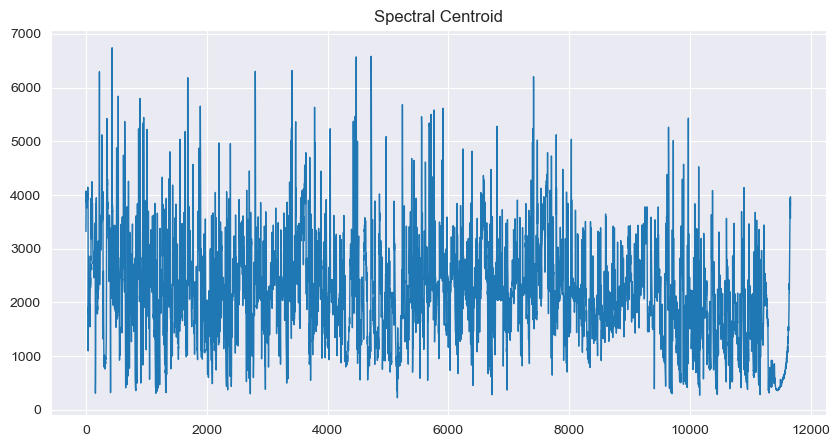

In [8]:
pd.Series(feature_repr.spectral_centroid).plot(figsize=(10,5), lw=1, title='Spectral Centroid')
plt.show()

## Spectral Rolloff

In [9]:
# Spectral rolloff
feature_vector.spectral.spectral_rolloff_mean , feature_vector.spectral.spectral_rolloff_var

(4709.464738684767, 4355229.028249889)

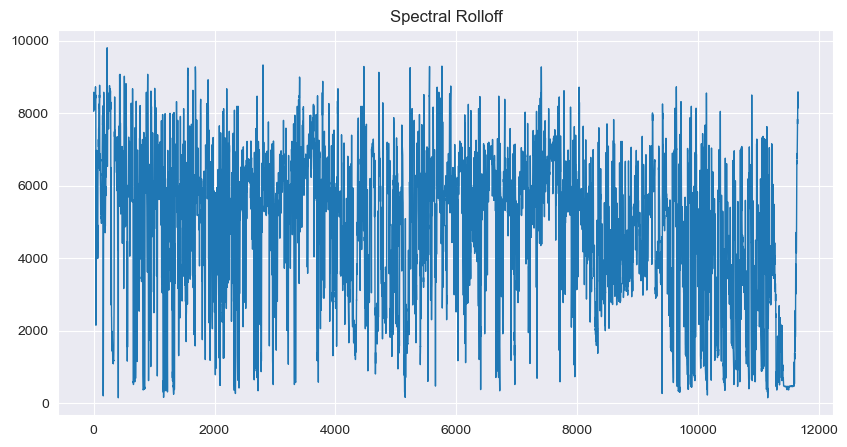

In [10]:
pd.Series(feature_repr.spectral_rolloff).plot(figsize=(10,5), lw=1, title='Spectral Rolloff')
plt.show()

## Spectral Flux

In [11]:
# Spectral flux
# squared distance between normalised magnitudes of successive spectral distributions
feature_vector.spectral.spectral_flux_mean , feature_vector.spectral.spectral_flux_var

(1.2898444, 3.9876528)

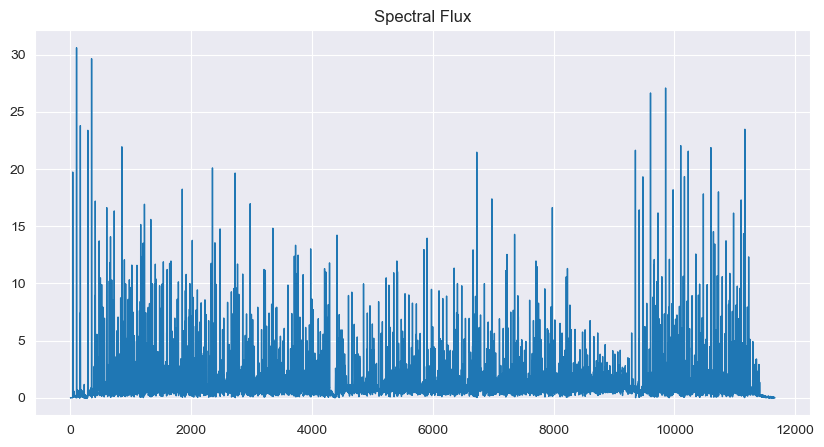

In [12]:
pd.Series(feature_repr.spectral_flux).plot(figsize=(10,5), lw=1, title='Spectral Flux')
plt.show()

## Time Domain Zero Crossings

In [13]:
feature_vector.temporal.zero_crossings_mean, feature_vector.temporal.zero_crossings_var

(0.07797833016195782, 0.07189771018711046)

In [14]:
feature_repr.zero_crossings
# might not be exactly the same as Tzanetakis' implementation

array([ True, False, False, ..., False, False, False])

## MFCC Extraction

13 MFCC coefficients, and using only the first 5 excluding DC component

In [15]:
cepstral_coefficients_df = pd.DataFrame(feature_repr.mfccs).transpose()

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

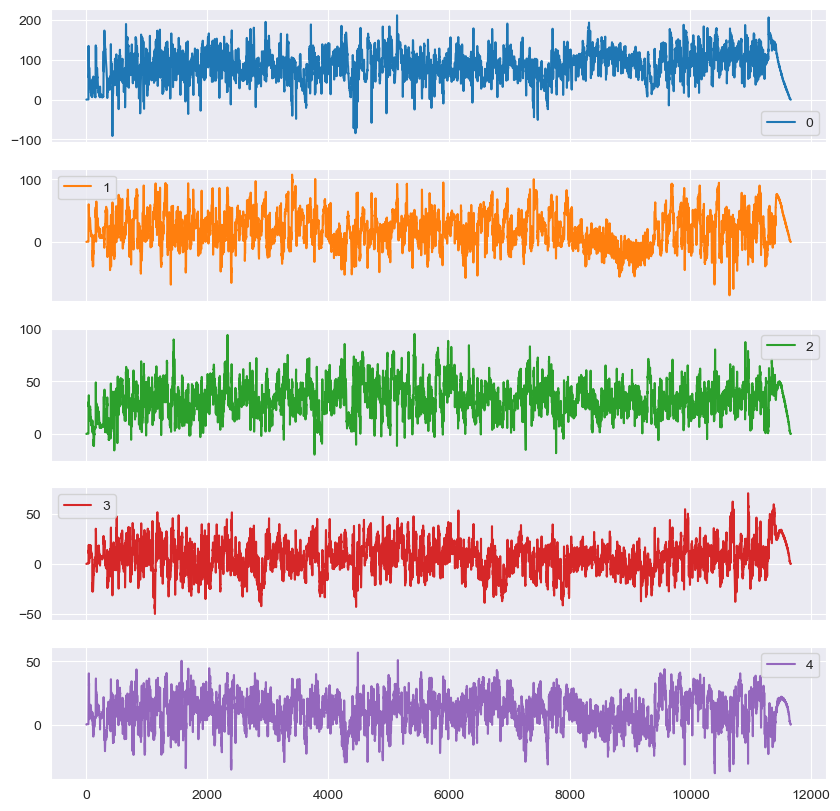

In [16]:
cepstral_coefficients_df.plot(subplots=True, figsize=(10,10))

In [17]:
cepstral_coefficients_df.mean()

0    90.003197
1    17.973377
2    33.278648
3     6.198291
4    10.277240
dtype: float32

In [18]:
cepstral_coefficients_df.var()

0    1404.071899
1     744.568359
2     242.621872
3     239.044708
4     151.634323
dtype: float32

# Chord Trajectory

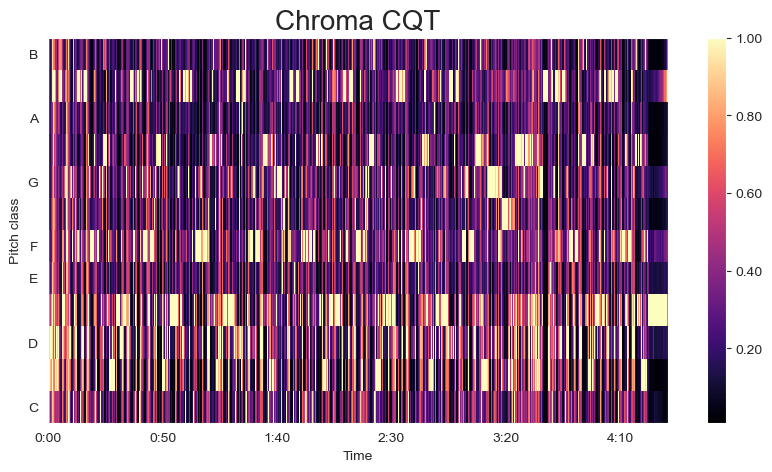

In [19]:
# CQT used for harmonic content over STFT for rhythmic content
# Plot data
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(feature_repr.chroma_cqt, x_axis='time', y_axis='chroma', ax=ax)
ax.set_title('Chroma CQT', fontsize=20)
fig.colorbar(img, ax=ax, format='%0.2f')
plt.show()

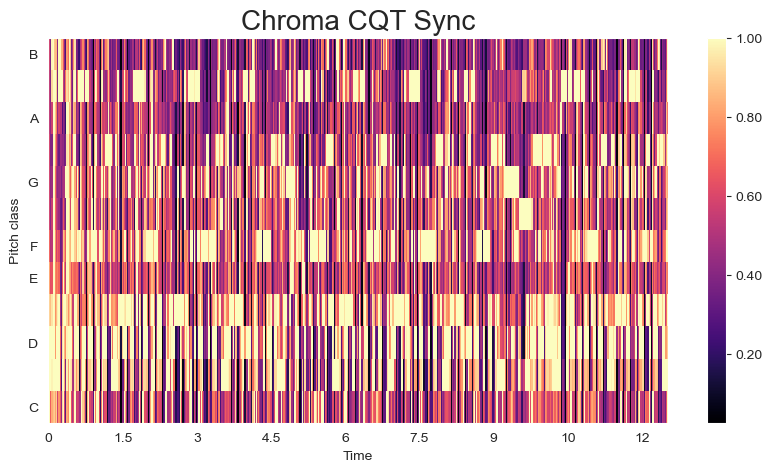

In [20]:
# Plot data
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(feature_repr.chroma_cqt_sync, x_axis='time', y_axis='chroma', ax=ax)
ax.set_title('Chroma CQT Sync', fontsize=20)
fig.colorbar(img, ax=ax, format='%0.2f')
plt.show()

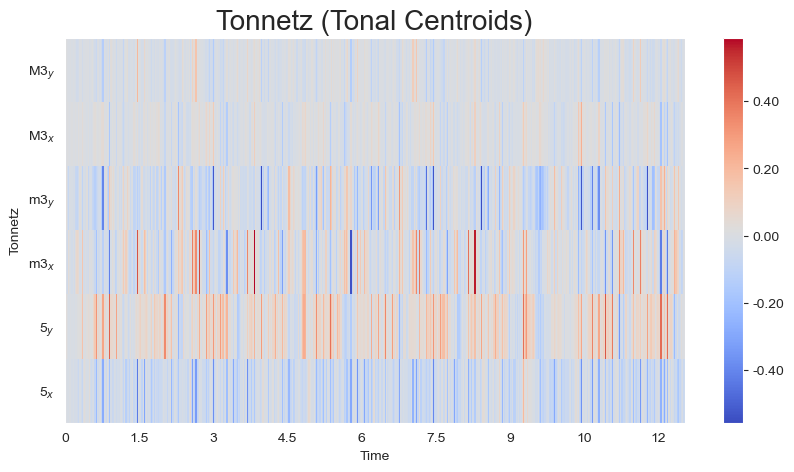

In [21]:
# Plot data
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(feature_repr.tonnetz, x_axis='time', y_axis='tonnetz', ax=ax)
ax.set_title('Tonnetz (Tonal Centroids)', fontsize=20)
fig.colorbar(img, ax=ax, format='%0.2f')
plt.show()

<Axes: >

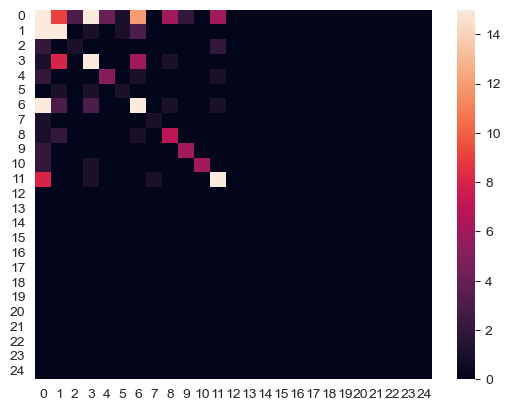

In [22]:
sns.heatmap(feature_repr.chord_trajectory, vmin=0, vmax=15)

In [23]:
# Most likely key signature
feature_vector.harmonic.key_signature

6

<Axes: >

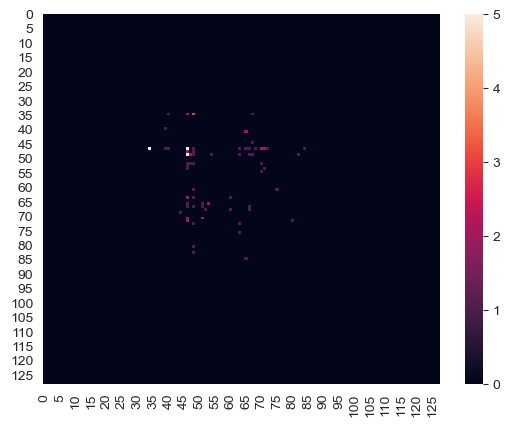

In [24]:
sns.heatmap(feature_repr.note_trajectory, vmin=0, vmax=5)

In [25]:
reduced = PCA(n_components=1).fit_transform(feature_repr.note_trajectory)

<Axes: >

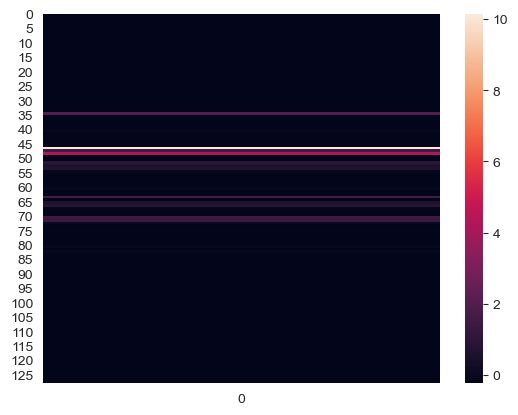

In [26]:
sns.heatmap(reduced)